Dataset source:  
https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

Dataset description:  
- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type  
    - Value 1: typical angina  
    - Value 2: atypical angina  
    - Value 3: non-anginal pain  
    - Value 4: asymptomatic  
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results  
    - Value 0: normal  
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  
- thalach : maximum heart rate achieved
- target : 0= less chance of heart attack 1= more chance of heart attack

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [3]:
df = pd.read_csv("../data/raw/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Categorial columns:
- sex
- cp (values 1,2,3,4)
- fbs (values 0,1)
- restecg (values 0,1,2)
- exng (values 0,1)
- slp (values 0,1,2)
- caa (values 0,1,2,3) in dataset we have one value equal to 4 -> check this
- thall 

Continous columns:
- age
- trtbps
- chol
- thalachh
- oldpeak

Target column:
- output

In [8]:
# convert categorial columns from int to category dtype.
cat_attr = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall"]

for attr in cat_attr:
    df[attr] = df[attr].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    category
 11  caa       303 non-null    category
 12  thall     303 non-null    category
 13  output    303 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 17.9 KB


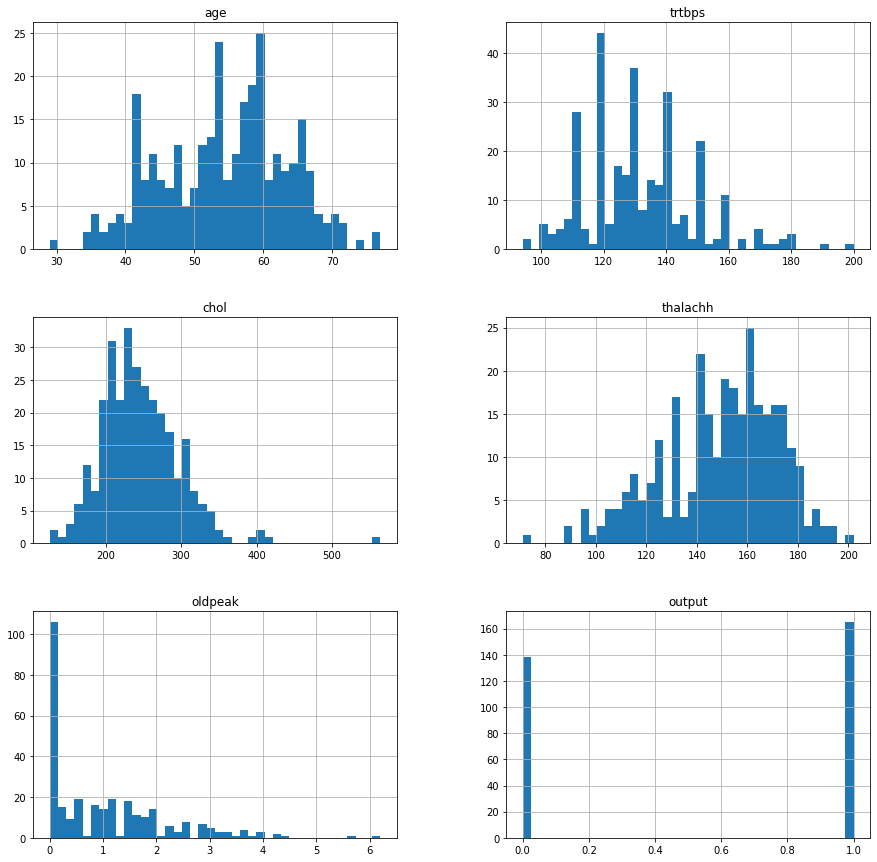

In [36]:
df.hist(figsize=(15,15), bins=40)
plt.show()

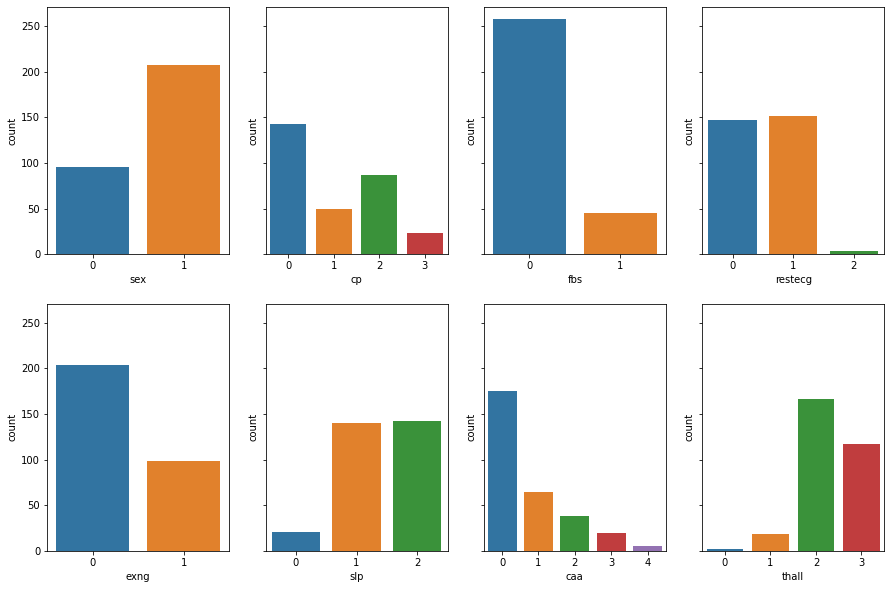

In [24]:
fig, ax = plt.subplots(2,4, figsize=(15,10), sharey=True)

sns.countplot(ax=ax[0,0], data=df, x="sex")
sns.countplot(ax=ax[0,1], data=df, x="cp")
sns.countplot(ax=ax[0,2], data=df, x="fbs")
sns.countplot(ax=ax[0,3], data=df, x="restecg")
sns.countplot(ax=ax[1,0], data=df, x="exng")
sns.countplot(ax=ax[1,1], data=df, x="slp")
sns.countplot(ax=ax[1,2], data=df, x="caa")
sns.countplot(ax=ax[1,3], data=df, x="thall")


plt.show()

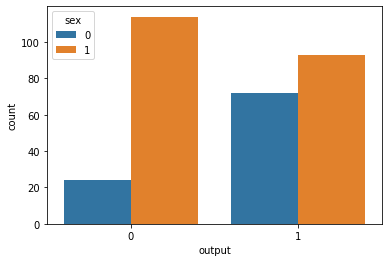

In [38]:
sns.countplot(data=df, x="output", hue="sex")

plt.show()

<AxesSubplot:>

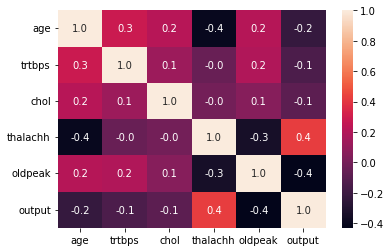

In [27]:
sns.heatmap(df.corr(), annot=True, fmt=".1f")